# Import libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
#unique values in each column
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,User ID,400
1,Gender,2
2,Age,43
3,EstimatedSalary,117
4,Purchased,2


In [11]:
df=df.drop(['User ID'], axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [12]:
df['Gender'] = df['Gender'].map({'Male':0 ,'Female':1})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


<AxesSubplot:>

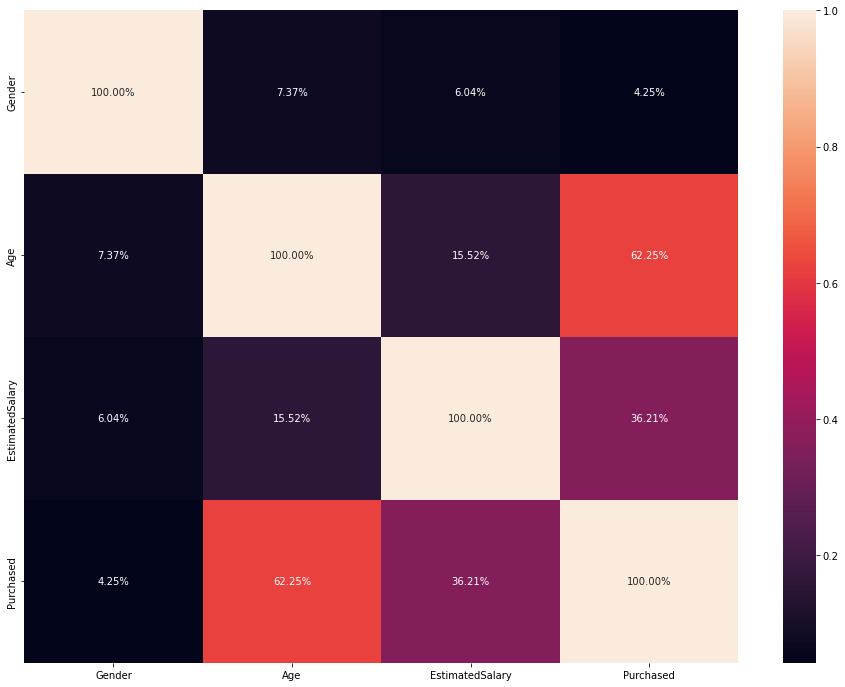

In [13]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

In [15]:
X = df[['Gender','Age', 'EstimatedSalary']].values
y = df['Purchased'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

# Instantiate model 
rf = RandomForestClassifier(max_depth=2,n_estimators=20,random_state=10)

# Train the model on training data
rf.fit(X_train_scaled, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test_scaled)

# # Calculate the absolute errors
# errors = abs(predictions - original_test_labels)

# # Print out the mean absolute error (mae)
# print('MAE :', round(np.mean(errors), 2), 'degrees.')

# Compare to baseline
# improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
# print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

#r2_score(baseline_preds, original_test_labels)
r2_score(y_pred, y_test)

0.6213657876943881

In [18]:
training_score = rf.score(X_train_scaled,y_train)*100
print("Train data score is :",training_score)

Train data score is : 92.1875


In [20]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
# rf.roc_auc_score(y_test, y_pred)

0.8771929824561403

In [21]:
confusion_matrix(y_test,y_pred)

array([[48,  4],
       [ 3, 25]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

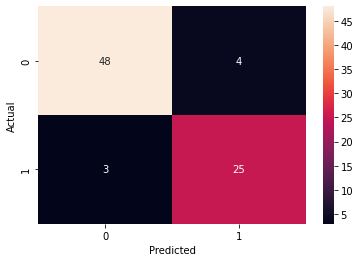

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)